In [2]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
from copy import deepcopy


### 单任务谣言检测结果，PHEME数据集（暂时）

200w2v-128s2v-64hidden-0.2dropout-0.001000weight.json
max F1: 0.7386225549560427 ,max Acc: 0.8095238095238095


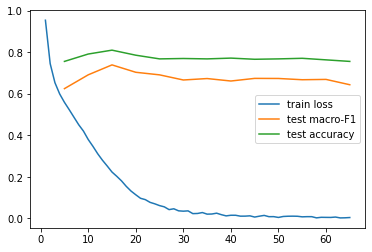

In [177]:
path = './log/final/onlyRumor/pheme/'
allFiles = os.listdir(path)
files = []
for i in range(len(allFiles)):
    if '.json' in allFiles[i]:
        files.append(allFiles[i])

f12file = {}
for file in files:
    with open(path + file, 'r') as f:
        content = json.loads(f.read())
    f12file[str(content['macroF1Rumor'])] = (deepcopy(content), file)
f1 = list(f12file.keys())
f1 = sorted(f1)
f1.reverse()
status, name = f12file[f1[0]]
status.keys()
epoch = [i for i in range(1, len(status['trainRumorF1']) + 1)]
testX = [i * 5 for i in range(1, len(status['testRumorF1']) + 1)]
plt.plot(epoch, status['trainLoss'], label='train loss')

#plt.plot(testX, status['testLoss'], label='test loss')
plt.plot(testX, status['testRumorF1'], label='test macro-F1')
plt.plot(testX, status['testRumorAcc'], label='test accuracy')
# plt.plot(testX, status['testRumorAcc'])
#plt.plot(testX, status['testStanceF1'])
plt.legend()
print(name)
print('max F1:',status['macroF1Rumor'], ',max Acc:', status['accRumor'])

50w2v-64s2v-256hidden-0.5dropout-0.001000weight.json
<built-in method keys of dict object at 0x7f88834f0540>
max F1: 0.704093417270909 ,max Acc: 0.7824463118580766 ,avgF1: 0.6620687797533417 ,start: 0 ,end: 105


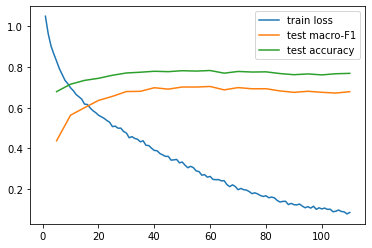

In [179]:
path = './log/final/onlyRumor/pheme/'

files = []
drop = [0.2,0.5]
weight = [1e-3, 1e-4]
for d in drop:
    for w in weight:
        file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
            50, 64, 256, d, w
        )
        if file in os.listdir(path):
            files.append(file)

f12file = {}
for file in files:
    with open(path + file, 'r') as f:
        content = json.loads(f.read())
    trainRumorF1 = np.array(content['trainRumorF1'])
    start = 0
    for index in range(len(trainRumorF1) - 20):
        window = trainRumorF1[index:index + 20]
        if abs(window.max() - window.min()) <= 0.01:
            start = index
            break
    testRumorF1 = np.array(content['testRumorF1'])
    part = testRumorF1[start // 5:]
    end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
    avgF1 = testRumorF1[start // 5 : end // 5].mean()
    f12file[str(avgF1)] = (deepcopy(content), file, avgF1, start, end)
f1 = list(f12file.keys())
f1 = sorted(f1)
f1.reverse()
status, name, avgF1, start, end = f12file[f1[0]]
status.keys()
epoch = [i for i in range(1, len(status['trainRumorF1']) + 1)]
testX = [i * 5 for i in range(1, len(status['testRumorF1']) + 1)]
plt.plot(epoch, status['trainLoss'], label='train loss')
# plt.plot(epoch, status['trainRumorF1'], label='train macro-F1')

#plt.plot(testX, status['testLoss'], label='test loss')
plt.plot(testX, status['testRumorF1'], label='test macro-F1')
plt.plot(testX, status['testRumorAcc'], label='test accuracy')
# plt.plot(testX, status['testRumorAcc'])
#plt.plot(testX, status['testStanceF1'])
plt.legend()
print(name)
print(status.keys)
print('max F1:',status['macroF1Rumor'], ',max Acc:', status['accRumor'], ',avgF1:', avgF1,\
      ',start:', start, ',end:', end, )

{'25-64-256': (0.7009122850529099, 0.7787114845938375), '50-64-256': (0.7148432332256298, 0.7759103641456583), '100-64-256': (0.7145422754381866, 0.7880485527544351), '200-64-256': (0.7117952800254455, 0.7833800186741363), '50-128-256': (0.7127798402740249, 0.7917833800186741), '50-256-256': (0.6977738257112702, 0.7796451914098973), '50-64-64': (0.7044389179379227, 0.7815126050420168), '50-64-128': (0.7272640283345674, 0.7973856209150327)}


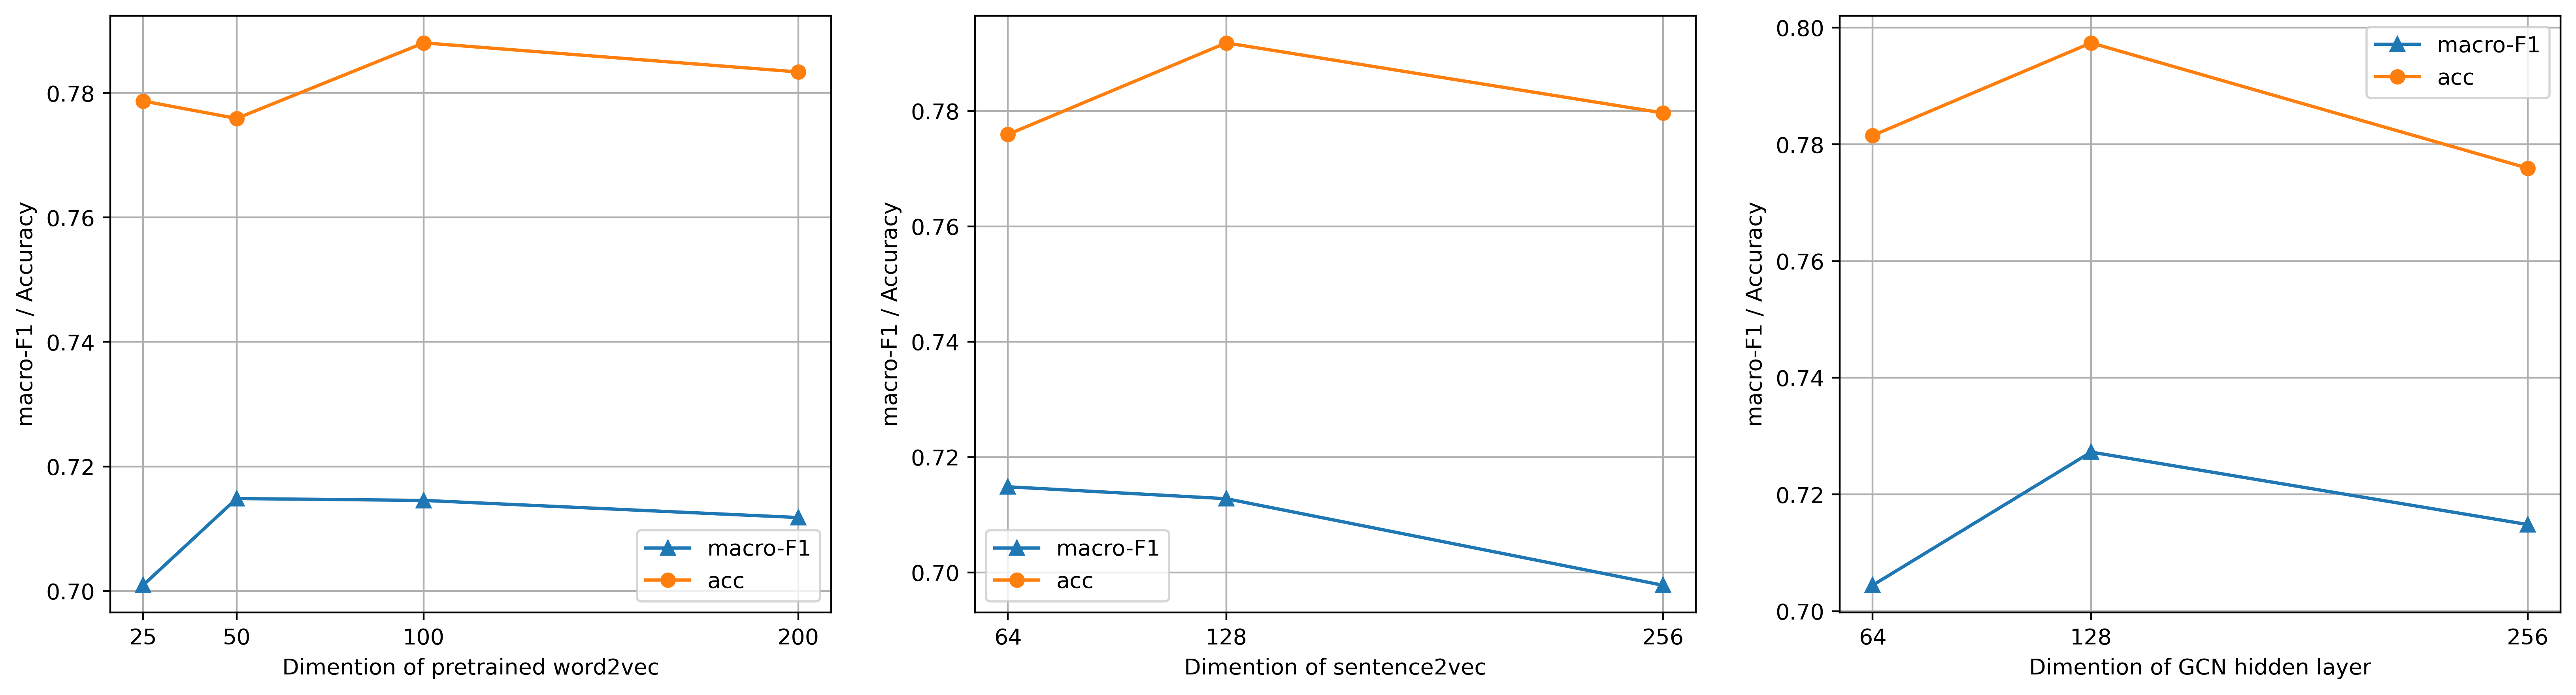

In [34]:
path = './log/final/onlyRumor/pheme/'

drop = [0.2,0.5]
weight = [1e-3, 1e-4]
name2Status = {}
for w2v in [25,50,100,200]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                w2v, 64, 256, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        if content['macroF1Rumor'] > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(w2v,64,256)] = (content['macroF1Rumor'], content['accRumor'])
            maxF1 = content['macroF1Rumor']
for s2v in [64, 128, 256]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                50, s2v, 256, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        if content['macroF1Rumor'] > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(50,s2v,256)] = (content['macroF1Rumor'], content['accRumor'])
            maxF1 = content['macroF1Rumor']
for hdim in [64, 128, 256]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                50, 64, hdim, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        if content['macroF1Rumor'] > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(50,64,hdim)] = (content['macroF1Rumor'], content['accRumor'])
            maxF1 = content['macroF1Rumor']
print(name2Status)
F1 = [name2Status['{:d}-64-256'.format(w2v)][0] for w2v in [25,50,100,200]]
acc = [name2Status['{:d}-64-256'.format(w2v)][1] for w2v in [25,50,100,200]]
plt.figure(figsize=(20,5),dpi=400)
plt.subplot(131)
plt.plot([25,50,100,200], F1, '-^', label='macro-F1')
plt.plot([25,50,100,200], acc, '-o', label='acc')
plt.grid()
plt.legend(loc='best')
plt.xticks([25,50,100,200])
plt.xlabel('Dimention of pretrained word2vec')
plt.ylabel('macro-F1 / Accuracy')
F1 = [name2Status['50-{:d}-256'.format(w2v)][0] for w2v in [64,128,256]]
acc = [name2Status['50-{:d}-256'.format(w2v)][1] for w2v in [64,128,256]]
plt.subplot(132)
plt.plot([64,128,256], F1, '-^', label='macro-F1')
plt.plot([64,128,256], acc, '-o', label='acc')
plt.grid()
plt.legend(loc='best')
plt.xticks([64,128,256])
plt.xlabel('Dimention of sentence2vec')
plt.ylabel('macro-F1 / Accuracy')
F1 = [name2Status['50-64-{:d}'.format(w2v)][0] for w2v in [64,128,256]]
acc = [name2Status['50-64-{:d}'.format(w2v)][1] for w2v in [64,128,256]]
plt.subplot(133)
plt.plot([64,128,256], F1, '-^', label='macro-F1')
plt.plot([64,128,256], acc, '-o', label='acc')
plt.grid()
plt.legend(loc='best')
plt.xticks([64,128,256])
plt.xlabel('Dimention of GCN hidden layer')
plt.ylabel('macro-F1 / Accuracy')

plt.savefig('../image/PHEMEsearch.pdf', format='pdf')

### 单任务谣言检测结果，SemEval数据集（暂时）

{'25-64-256': (0.5722623366942273, 0.5875576036866359), '50-64-256': (0.737012987012987, 0.724379928376551), '100-64-256': (0.6301709154179204, 0.6377551020408163), '200-64-256': (0.5760696714639596, 0.5833333333333333), '50-128-256': (0.7127679399166814, 0.7), '50-256-256': (0.5527049024819922, 0.5642857142857143), '50-64-64': (0.5370370370370371, 0.5135327699442065), '50-64-128': (0.5928571428571429, 0.42222542938571717)}


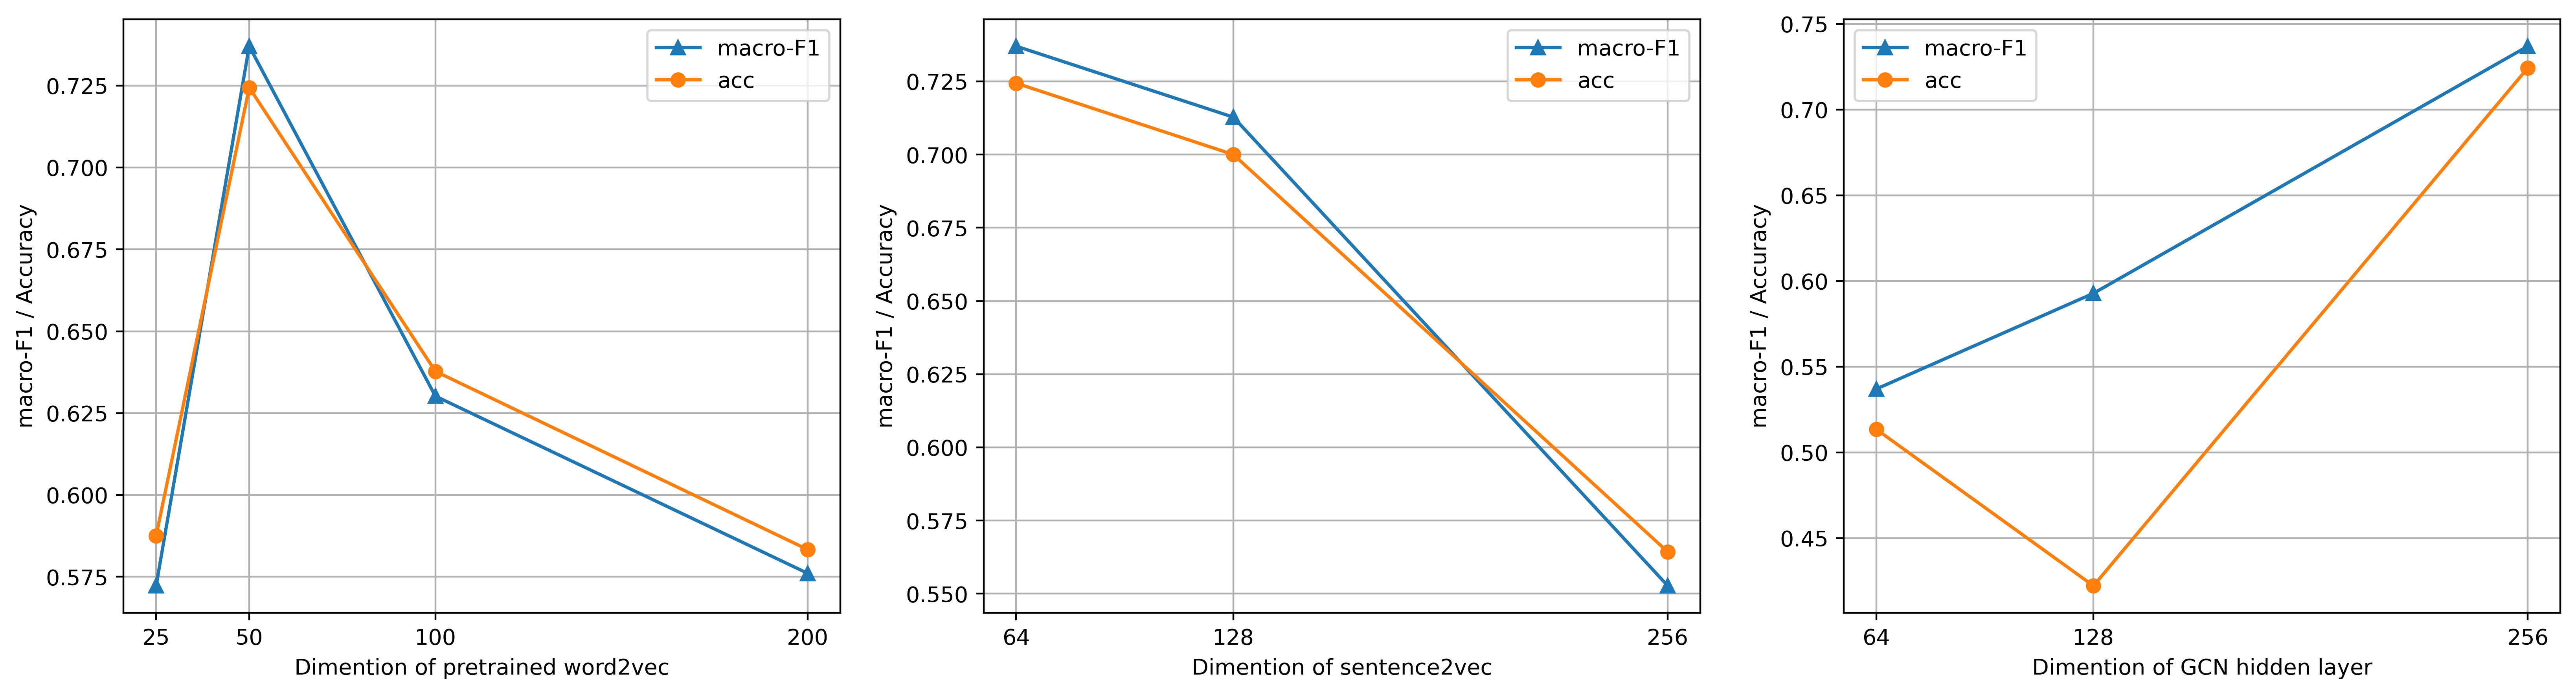

In [32]:
path = './log/final/onlyRumor/semeval/'

drop = [0.2,0.5]
weight = [1e-3, 1e-4]
name2Status = {}
for w2v in [25,50,100,200]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                w2v, 64, 256, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        trainRumorF1 = np.array(content['trainRumorF1'])
        start = 0
        for index in range(len(trainRumorF1) - 20):
            window = trainRumorF1[index:index + 20]
            if abs(window.max() - window.min()) <= 0.01:
                start = index
                break
        testRumorF1 = np.array(content['testRumorF1'])
        part = testRumorF1[start // 5:]
        end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
        avgF1 = testRumorF1[start // 5 : end // 5].mean()
        testRumorAcc = np.array(content['testRumorAcc'])
        avgAcc = testRumorAcc[start // 5 : end // 5].mean()
        if avgF1 > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(w2v,64,256)] = (avgF1, avgAcc)
            maxF1 = avgF1
for s2v in [64, 128, 256]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                50, s2v, 256, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        trainRumorF1 = np.array(content['trainRumorF1'])
        start = 0
        for index in range(len(trainRumorF1) - 20):
            window = trainRumorF1[index:index + 20]
            if abs(window.max() - window.min()) <= 0.01:
                start = index
                break
        testRumorF1 = np.array(content['testRumorF1'])
        part = testRumorF1[start // 5:]
        end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
        avgF1 = testRumorF1[start // 5 : end // 5].mean()
        testRumorAcc = np.array(content['testRumorAcc'])
        avgAcc = testRumorAcc[start // 5 : end // 5].mean()
        if avgF1 > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(50,s2v,256)] = (avgF1, avgAcc)
            maxF1 = avgF1
for hdim in [64, 128, 256]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                50, 64, hdim, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        trainRumorF1 = np.array(content['trainRumorF1'])
        start = 0
        for index in range(len(trainRumorF1) - 20):
            window = trainRumorF1[index:index + 20]
            if abs(window.max() - window.min()) <= 0.01:
                start = index
                break
        testRumorF1 = np.array(content['testRumorF1'])
        part = testRumorF1[start // 5:]
        end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
        avgF1 = testRumorAcc[start // 5 : end // 5].mean()
        testRumorAcc = np.array(content['testRumorAcc'])
        avgAcc = testRumorF1[start // 5 : end // 5].mean()
        if avgF1 > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(50,64,hdim)] = (avgF1, avgAcc)
            maxF1 = avgF1
print(name2Status)
F1 = [name2Status['{:d}-64-256'.format(w2v)][0] for w2v in [25,50,100,200]]
acc = [name2Status['{:d}-64-256'.format(w2v)][1] for w2v in [25,50,100,200]]
plt.figure(figsize=(20,5),dpi=400)
plt.subplot(131)
plt.plot([25,50,100,200], F1, '-^', label='macro-F1')
plt.plot([25,50,100,200], acc, '-o', label='acc')
plt.grid()
plt.legend(loc='best')
plt.xticks([25,50,100,200])
plt.xlabel('Dimention of pretrained word2vec')
plt.ylabel('macro-F1 / Accuracy')
F1 = [name2Status['50-{:d}-256'.format(w2v)][0] for w2v in [64,128,256]]
acc = [name2Status['50-{:d}-256'.format(w2v)][1] for w2v in [64,128,256]]
plt.subplot(132)
plt.plot([64,128,256], F1, '-^', label='macro-F1')
plt.plot([64,128,256], acc, '-o', label='acc')
plt.grid()
plt.legend(loc='best')
plt.xticks([64,128,256])
plt.xlabel('Dimention of sentence2vec')
plt.ylabel('macro-F1 / Accuracy')
F1 = [name2Status['50-64-{:d}'.format(w2v)][0] for w2v in [64,128,256]]
acc = [name2Status['50-64-{:d}'.format(w2v)][1] for w2v in [64,128,256]]
plt.subplot(133)
plt.plot([64,128,256], F1, '-^', label='macro-F1')
plt.plot([64,128,256], acc, '-o', label='acc')
plt.grid()
plt.legend(loc='best')
plt.xticks([64,128,256])
plt.xlabel('Dimention of GCN hidden layer')
plt.ylabel('macro-F1 / Accuracy')
#plt.show()
plt.savefig('../image/SemEvalsearch.pdf', format='pdf')

### 多任务学习结果，SemEval数据集，needStance

50w2v-64s2v-256hidden-0.2dropout-0.001000weight.json
max F1: 0.9326599326599326 ,max Acc: 0.9285714285714286 ,avgF1: 0.7932075136284285 ,start: 156 ,end: 370


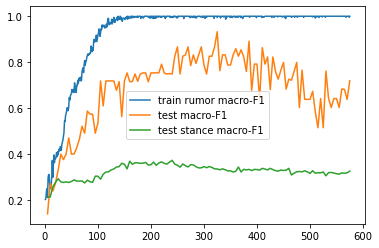

In [163]:
path = './log/final/needStance/origion/'
allFiles = os.listdir(path)
files = []
for i in range(len(allFiles)):
    if '.json' in allFiles[i]:
        files.append(allFiles[i])

f12file = {}
for file in files:
    with open(path + file, 'r') as f:
        content = json.loads(f.read())
    trainRumorF1 = np.array(content['trainRumorF1'])
    start = 0
    for index in range(len(trainRumorF1) - 20):
        window = trainRumorF1[index:index + 20]
        if abs(window.max() - window.min()) <= 0.01:
            start = index
            break
    testRumorF1 = np.array(content['testRumorF1'])
    part = testRumorF1[start // 5:]
    end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
    avgF1 = testRumorF1[start // 5 : end // 5].mean()
    f12file[str(avgF1)] = (deepcopy(content), file, avgF1, start, end)
f1 = list(f12file.keys())
f1 = sorted(f1)
f1.reverse()
status, name, avgF1, start, end = f12file[f1[0]]
status.keys()
epoch = [i for i in range(1, len(status['trainRumorF1']) + 1)]
testX = [i * 5 for i in range(1, len(status['testRumorF1']) + 1)]
#plt.plot(epoch, status['trainLoss'], label='train loss')
plt.plot(epoch, status['trainRumorF1'], label='train rumor macro-F1')
# plt.plot(epoch, status['trainStanceF1'], label='train stance macro-F1')

#plt.plot(testX, status['testLoss'], label='test loss')
plt.plot(testX, status['testRumorF1'], label='test macro-F1')
# plt.plot(testX, status['testRumorAcc'], label='test accuracy')
# plt.plot(testX, status['testRumorAcc'])
plt.plot(testX, status['testStanceF1'], label='test stance macro-F1')
plt.legend()
print(name)
print('max F1:',status['macroF1Rumor'], ',max Acc:', status['accRumor'], ',avgF1:', avgF1,\
      ',start:', start, ',end:', end, )

{'25-64-256': (0.6540248545155158, 0.6436507936507936, 0.34110412549557495, 0.6419199943508808), '50-64-256': (0.7932075136284285, 0.7890365448504982, 0.34837252584247136, 0.6733766377724079), '100-64-256': (0.6544097285583353, 0.6456043956043958, 0.344725846489022, 0.7060937156266042), '200-64-256': (0.5238920030586696, 0.5275974025974027, 0.3441452230938704, 0.6178178351676921), '50-128-256': (0.6103739722297454, 0.593956043956044, 0.34911668681057945, 0.6515655936056318), '50-256-256': (0.5987043711835743, 0.6, 0.35053376787620283, 0.6132697807435652), '50-64-64': (0.7442566144868776, 0.7477678571428572, 0.3601830980661227, 0.7007268827454719), '50-64-128': (0.6250546916364536, 0.6168831168831168, 0.33004334345894076, 0.7056937342923997)}


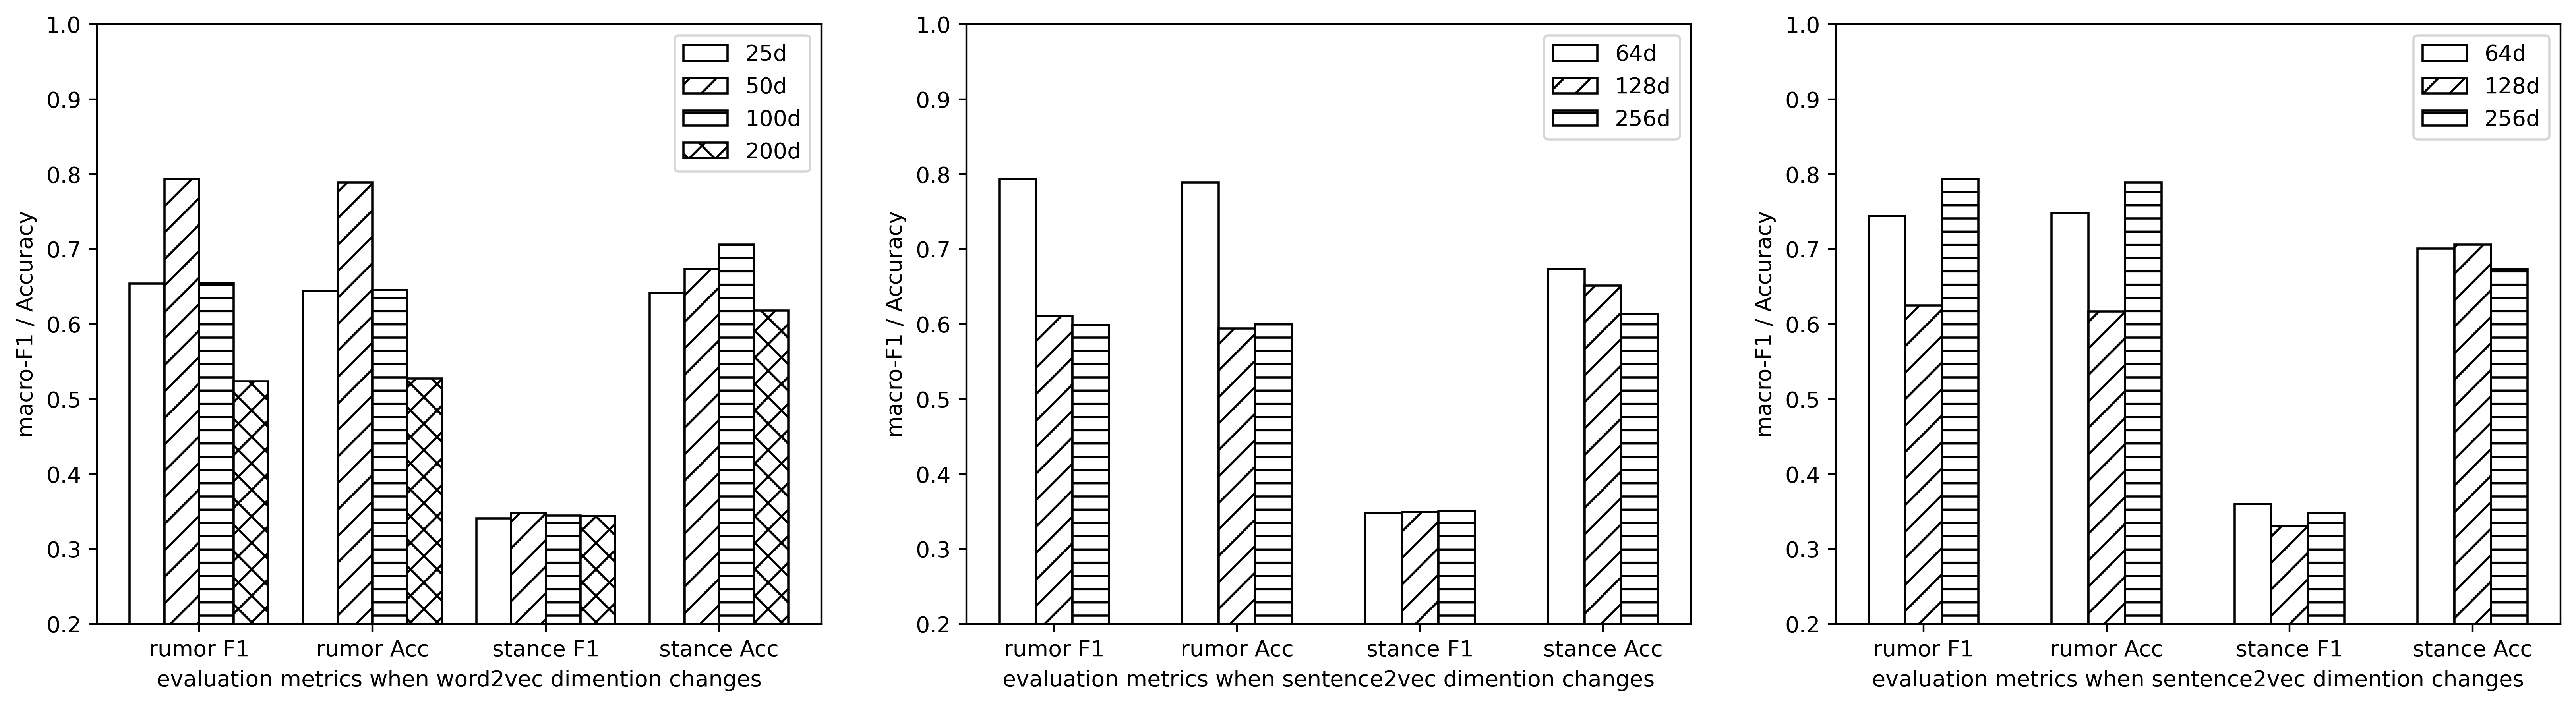

In [28]:
path = './log/final/needStance/origion/'

drop = [0.2,0.5]
weight = [1e-3, 1e-4]
name2Status = {}
for w2v in [25,50,100,200]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                w2v, 64, 256, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        trainRumorF1 = np.array(content['trainRumorF1'])
        start = 0
        for index in range(len(trainRumorF1) - 20):
            window = trainRumorF1[index:index + 20]
            if abs(window.max() - window.min()) <= 0.01:
                start = index
                break
        testRumorF1 = np.array(content['testRumorF1'])
        part = testRumorF1[start // 5:]
        end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
        avgRF1 = testRumorF1[start // 5 : end // 5].mean()
        testRumorAcc = np.array(content['testRumorAcc'])
        avgRAcc = testRumorAcc[start // 5 : end // 5].mean()
        testStanceF1 = np.array(content['testStanceF1'])
        avgSF1 = testStanceF1[start // 5 : end // 5].mean()
        testStanceAcc = np.array(content['testStanceAcc'])
        avgSAcc = testStanceAcc[start // 5 : end // 5].mean()
        if avgRF1 > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(w2v,64,256)] = (avgRF1, avgRAcc, avgSF1, avgSAcc)
            maxF1 = avgRF1
for s2v in [64, 128, 256]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                50, s2v, 256, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        trainRumorF1 = np.array(content['trainRumorF1'])
        start = 0
        for index in range(len(trainRumorF1) - 20):
            window = trainRumorF1[index:index + 20]
            if abs(window.max() - window.min()) <= 0.01:
                start = index
                break
        testRumorF1 = np.array(content['testRumorF1'])
        part = testRumorF1[start // 5:]
        end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
        avgRF1 = testRumorF1[start // 5 : end // 5].mean()
        testRumorAcc = np.array(content['testRumorAcc'])
        avgRAcc = testRumorAcc[start // 5 : end // 5].mean()
        testStanceF1 = np.array(content['testStanceF1'])
        avgSF1 = testStanceF1[start // 5 : end // 5].mean()
        testStanceAcc = np.array(content['testStanceAcc'])
        avgSAcc = testStanceAcc[start // 5 : end // 5].mean()
        if avgRF1 > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(50,s2v,256)] = (avgRF1, avgRAcc, avgSF1, avgSAcc)
            maxF1 = avgRF1
for hdim in [64, 128, 256]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                50, 64, hdim, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        trainRumorF1 = np.array(content['trainRumorF1'])
        start = 0
        for index in range(len(trainRumorF1) - 20):
            window = trainRumorF1[index:index + 20]
            if abs(window.max() - window.min()) <= 0.01:
                start = index
                break
        testRumorF1 = np.array(content['testRumorF1'])
        part = testRumorF1[start // 5:]
        end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
        avgRF1 = testRumorF1[start // 5 : end // 5].mean()
        testRumorAcc = np.array(content['testRumorAcc'])
        avgRAcc = testRumorAcc[start // 5 : end // 5].mean()
        testStanceF1 = np.array(content['testStanceF1'])
        avgSF1 = testStanceF1[start // 5 : end // 5].mean()
        testStanceAcc = np.array(content['testStanceAcc'])
        avgSAcc = testStanceAcc[start // 5 : end // 5].mean()
        if avgRF1 > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(50,64,hdim)] = (avgRF1, avgRAcc, avgSF1, avgSAcc)
            maxF1 = avgRF1
print(name2Status)
plt.figure(figsize=(20,5),dpi=400)
total_width, n = 0.8, 4
width = total_width / n
x = np.arange(4)
x = x - (total_width - width) / 2
plt.subplot(131)
plt.bar(x, name2Status['25-64-256'], width=width, label='25d', color='white', edgecolor="k")
plt.bar(x + width, name2Status['50-64-256'], width=width, label='50d', hatch='//', color='white', edgecolor="k")
plt.bar(x + 2 * width, name2Status['100-64-256'], width=width, label='100d', hatch='--', color='white', edgecolor="k")
plt.bar(x + 3 * width, name2Status['200-64-256'], width=width, label='200d', hatch='xx', color='white', edgecolor="k")
plt.ylim((0.2, 1))
plt.legend()
plt.xticks(x + 1.5 * width, ['rumor F1','rumor Acc','stance F1', 'stance Acc'])
plt.xlabel('evaluation metrics when word2vec dimention changes')
plt.ylabel('macro-F1 / Accuracy')

plt.subplot(132)
plt.bar(x, name2Status['50-64-256'], width=width, label='64d', color='white', edgecolor="k")
plt.bar(x + width, name2Status['50-128-256'], width=width, label='128d', hatch='//', color='white', edgecolor="k")
plt.bar(x + 2 * width, name2Status['50-256-256'], width=width, label='256d', hatch='--', color='white', edgecolor="k")
plt.ylim((0.2, 1))
plt.legend()
plt.xticks(x + 1 * width, ['rumor F1','rumor Acc','stance F1', 'stance Acc'])
plt.xlabel('evaluation metrics when sentence2vec dimention changes')
plt.ylabel('macro-F1 / Accuracy')

plt.subplot(133)
plt.bar(x, name2Status['50-64-64'], width=width, label='64d', color='white', edgecolor="k")
plt.bar(x + width, name2Status['50-64-128'], width=width, label='128d', hatch='//', color='white', edgecolor="k")
plt.bar(x + 2 * width, name2Status['50-64-256'], width=width, label='256d', hatch='--', color='white', edgecolor="k")
plt.ylim((0.2, 1))
plt.legend(loc='best')
plt.xticks(x + 1 * width, ['rumor F1','rumor Acc','stance F1', 'stance Acc'])
plt.xlabel('evaluation metrics when sentence2vec dimention changes')
plt.ylabel('macro-F1 / Accuracy')

plt.savefig('../image/SemEvalwithStanceSearch.pdf', format='pdf')

### 多任务学习结果，SemEval数据集，needNoStance

{'25-64-256': (0.4771293289009147, 0.4920634920634921, 0.38271719518806246, 0.7335028069060481), '50-64-256': (0.570935787924952, 0.5624999999999999, 0.35919214467511057, 0.6924054655227202), '100-64-256': (0.4886002258461539, 0.5273109243697478, 0.34398222772604226, 0.6990971793865306), '200-64-256': (0.5497831336558047, 0.538961038961039, 0.3722492940424356, 0.6602825201490596), '50-128-256': (0.5373124070876685, 0.5416666666666666, 0.37424569860605145, 0.650023832221163), '50-256-256': (0.6204665898848462, 0.6244239631336408, 0.34873672753384083, 0.6596758817921832), '50-64-64': (0.603517299884689, 0.6, 0.37278474009975243, 0.6629806164601207), '50-64-128': (0.588189086953389, 0.5642857142857143, 0.35872071322630517, 0.6606291706387036)}


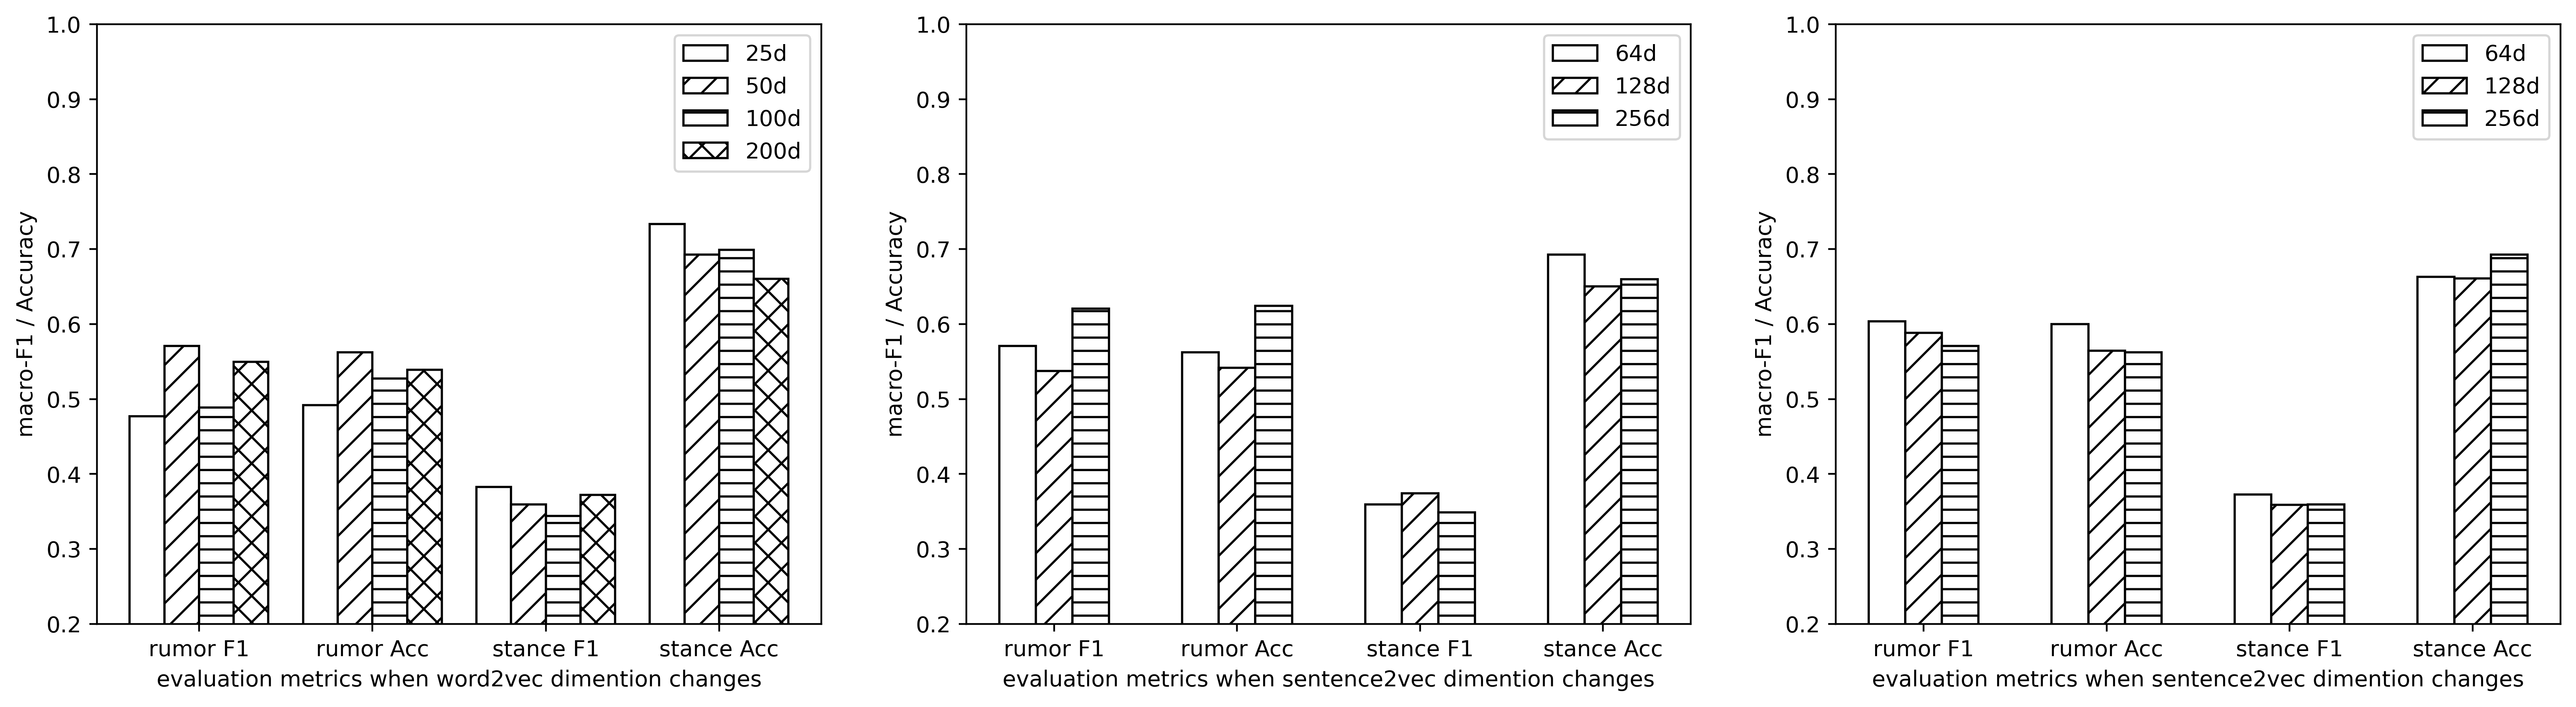

In [27]:
path = './log/compare/needNoStance/'

drop = [0.2,0.5]
weight = [1e-3, 1e-4]
name2Status = {}
for w2v in [25,50,100,200]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                w2v, 64, 256, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        trainRumorF1 = np.array(content['trainRumorF1'])
        start = 0
        for index in range(len(trainRumorF1) - 20):
            window = trainRumorF1[index:index + 20]
            if abs(window.max() - window.min()) <= 0.01:
                start = index
                break
        testRumorF1 = np.array(content['testRumorF1'])
        part = testRumorF1[start // 5:]
        end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
        avgRF1 = testRumorF1[start // 5 : end // 5].mean()
        testRumorAcc = np.array(content['testRumorAcc'])
        avgRAcc = testRumorAcc[start // 5 : end // 5].mean()
        testStanceF1 = np.array(content['testStanceF1'])
        avgSF1 = testStanceF1[start // 5 : end // 5].mean()
        testStanceAcc = np.array(content['testStanceAcc'])
        avgSAcc = testStanceAcc[start // 5 : end // 5].mean()
        if avgRF1 > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(w2v,64,256)] = (avgRF1, avgRAcc, avgSF1, avgSAcc)
            maxF1 = avgRF1
for s2v in [64, 128, 256]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                50, s2v, 256, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        trainRumorF1 = np.array(content['trainRumorF1'])
        start = 0
        for index in range(len(trainRumorF1) - 20):
            window = trainRumorF1[index:index + 20]
            if abs(window.max() - window.min()) <= 0.01:
                start = index
                break
        testRumorF1 = np.array(content['testRumorF1'])
        part = testRumorF1[start // 5:]
        end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
        avgRF1 = testRumorF1[start // 5 : end // 5].mean()
        testRumorAcc = np.array(content['testRumorAcc'])
        avgRAcc = testRumorAcc[start // 5 : end // 5].mean()
        testStanceF1 = np.array(content['testStanceF1'])
        avgSF1 = testStanceF1[start // 5 : end // 5].mean()
        testStanceAcc = np.array(content['testStanceAcc'])
        avgSAcc = testStanceAcc[start // 5 : end // 5].mean()
        if avgRF1 > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(50,s2v,256)] = (avgRF1, avgRAcc, avgSF1, avgSAcc)
            maxF1 = avgRF1
for hdim in [64, 128, 256]:
    files = []
    for d in drop:
        for w in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                50, 64, hdim, d, w
            )
            if file in os.listdir(path):
                files.append(file)
    maxF1 = 0.
    for file in files:
        with open(path + file, 'r') as f:
            content = json.loads(f.read())
        trainRumorF1 = np.array(content['trainRumorF1'])
        start = 0
        for index in range(len(trainRumorF1) - 20):
            window = trainRumorF1[index:index + 20]
            if abs(window.max() - window.min()) <= 0.01:
                start = index
                break
        testRumorF1 = np.array(content['testRumorF1'])
        part = testRumorF1[start // 5:]
        end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
        avgRF1 = testRumorF1[start // 5 : end // 5].mean()
        testRumorAcc = np.array(content['testRumorAcc'])
        avgRAcc = testRumorAcc[start // 5 : end // 5].mean()
        testStanceF1 = np.array(content['testStanceF1'])
        avgSF1 = testStanceF1[start // 5 : end // 5].mean()
        testStanceAcc = np.array(content['testStanceAcc'])
        avgSAcc = testStanceAcc[start // 5 : end // 5].mean()
        if avgRF1 > maxF1:
            name2Status['{:d}-{:d}-{:d}'.format(50,64,hdim)] = (avgRF1, avgRAcc, avgSF1, avgSAcc)
            maxF1 = avgRF1
print(name2Status)
plt.figure(figsize=(20,5),dpi=400)
total_width, n = 0.8, 4
width = total_width / n
x = np.arange(4)
x = x - (total_width - width) / 2
plt.subplot(131)
plt.bar(x, name2Status['25-64-256'], width=width, label='25d', color='white', edgecolor="k")
plt.bar(x + width, name2Status['50-64-256'], width=width, label='50d', hatch='//', color='white', edgecolor="k")
plt.bar(x + 2 * width, name2Status['100-64-256'], width=width, label='100d', hatch='--', color='white', edgecolor="k")
plt.bar(x + 3 * width, name2Status['200-64-256'], width=width, label='200d', hatch='xx', color='white', edgecolor="k")
plt.ylim((0.2, 1))
plt.legend()
plt.xticks(x + 1.5 * width, ['rumor F1','rumor Acc','stance F1', 'stance Acc'])
plt.xlabel('evaluation metrics when word2vec dimention changes')
plt.ylabel('macro-F1 / Accuracy')

plt.subplot(132)
plt.bar(x, name2Status['50-64-256'], width=width, label='64d', color='white', edgecolor="k")
plt.bar(x + width, name2Status['50-128-256'], width=width, label='128d', hatch='//', color='white', edgecolor="k")
plt.bar(x + 2 * width, name2Status['50-256-256'], width=width, label='256d', hatch='--', color='white', edgecolor="k")
plt.ylim((0.2, 1))
plt.legend()
plt.xticks(x + 1 * width, ['rumor F1','rumor Acc','stance F1', 'stance Acc'])
plt.xlabel('evaluation metrics when sentence2vec dimention changes')
plt.ylabel('macro-F1 / Accuracy')

plt.subplot(133)
plt.bar(x, name2Status['50-64-64'], width=width, label='64d', color='white', edgecolor="k")
plt.bar(x + width, name2Status['50-64-128'], width=width, label='128d', hatch='//', color='white', edgecolor="k")
plt.bar(x + 2 * width, name2Status['50-64-256'], width=width, label='256d', hatch='--', color='white', edgecolor="k")
plt.ylim((0.2, 1))
plt.legend(loc='best')
plt.xticks(x + 1 * width, ['rumor F1','rumor Acc','stance F1', 'stance Acc'])
plt.xlabel('evaluation metrics when sentence2vec dimention changes')
plt.ylabel('macro-F1 / Accuracy')

plt.savefig('../image/SemEvalnoStanceSearch.pdf', format='pdf')

### 拆除实验

[0.570935787924952, 0.7932075136284285]
[0.5624999999999999, 0.7890365448504982]
[0.35919214467511057, 0.34837252584247136]
[0.6924054655227202, 0.6733766377724079]


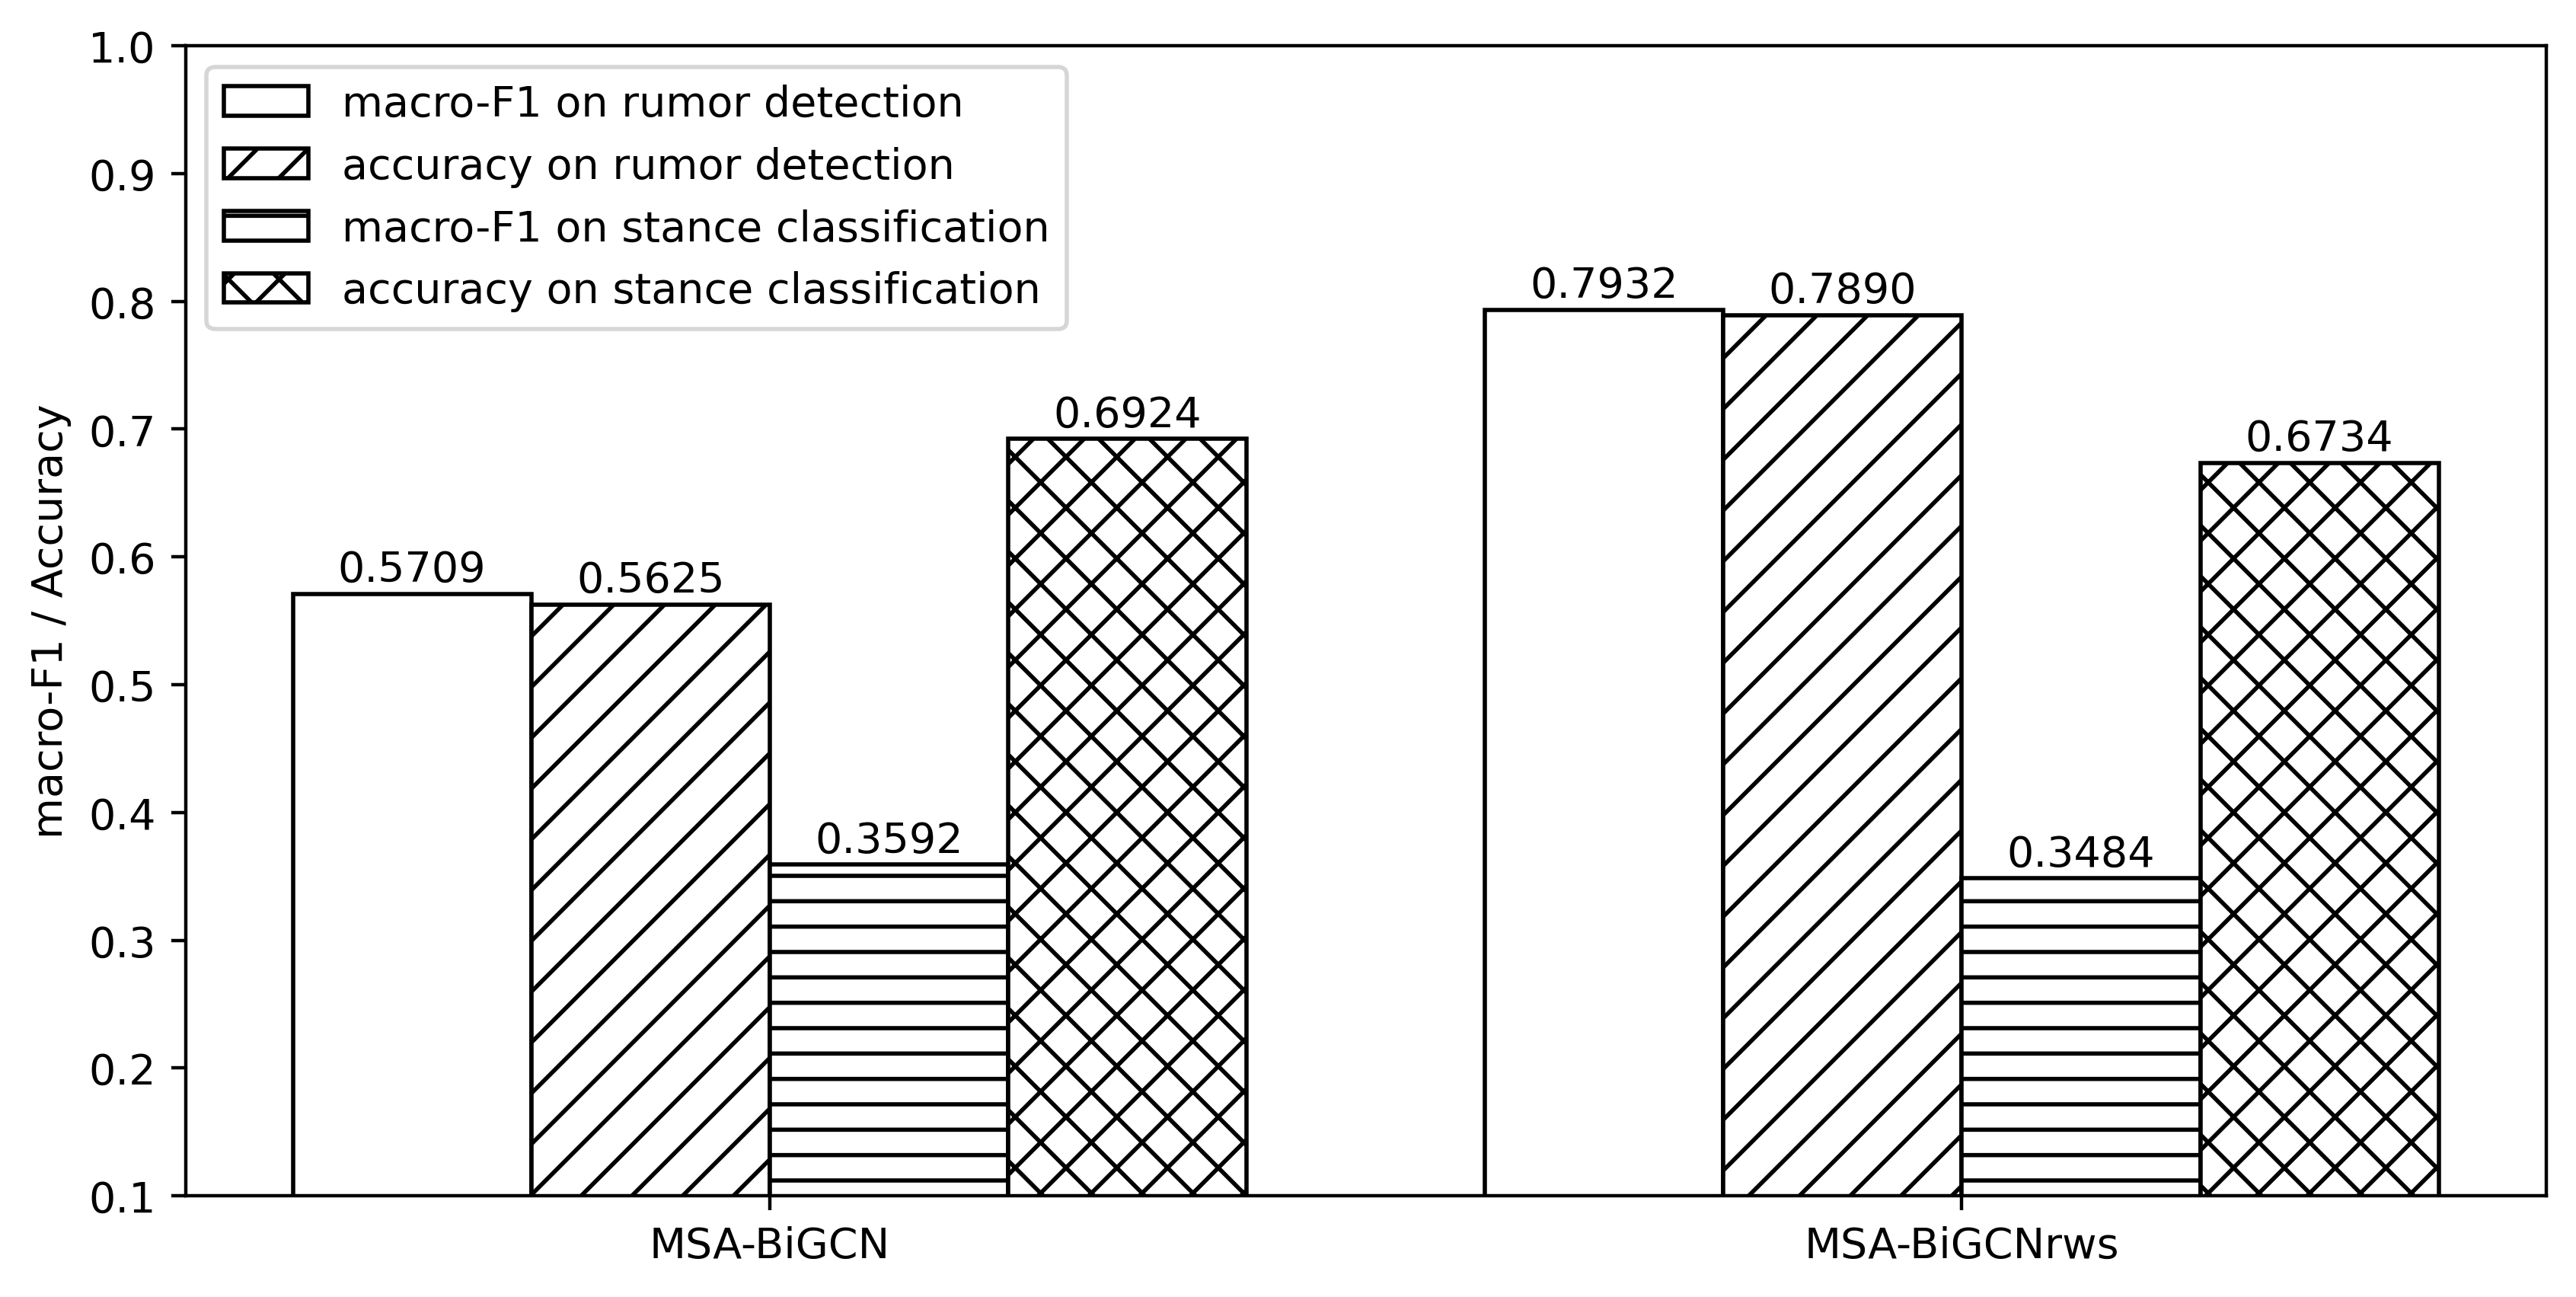

In [29]:
rumorF1 = []
rumorAcc = []
stanceF1 = []
stanceAcc = []

path = './log/compare/needNoStance/'
file = '50w2v-64s2v-256hidden-0.2dropout-0.001000weight.json'

with open(path + file, 'r') as f:
    content = json.loads(f.read())
trainRumorF1 = np.array(content['trainRumorF1'])
start = 0
for index in range(len(trainRumorF1) - 20):
    window = trainRumorF1[index:index + 20]
    if abs(window.max() - window.min()) <= 0.01:
        start = index
        break
testRumorF1 = np.array(content['testRumorF1'])
part = testRumorF1[start // 5:]
end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
rumorF1.append(testRumorF1[start // 5 : end // 5].mean())
testRumorAcc = np.array(content['testRumorAcc'])
rumorAcc.append(testRumorAcc[start // 5 : end // 5].mean())
testStanceF1 = np.array(content['testStanceF1'])
stanceF1.append(testStanceF1[start // 5 : end // 5].mean())
testStanceAcc = np.array(content['testStanceAcc'])
stanceAcc.append(testStanceAcc[start // 5 : end // 5].mean())

path = './log/final/needStance/origion/'
file = '50w2v-64s2v-256hidden-0.2dropout-0.001000weight.json'

with open(path + file, 'r') as f:
    content = json.loads(f.read())
trainRumorF1 = np.array(content['trainRumorF1'])
start = 0
for index in range(len(trainRumorF1) - 20):
    window = trainRumorF1[index:index + 20]
    if abs(window.max() - window.min()) <= 0.01:
        start = index
        break
testRumorF1 = np.array(content['testRumorF1'])
part = testRumorF1[start // 5:]
end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
rumorF1.append(testRumorF1[start // 5 : end // 5].mean())
testRumorAcc = np.array(content['testRumorAcc'])
rumorAcc.append(testRumorAcc[start // 5 : end // 5].mean())
testStanceF1 = np.array(content['testStanceF1'])
stanceF1.append(testStanceF1[start // 5 : end // 5].mean())
testStanceAcc = np.array(content['testStanceAcc'])
stanceAcc.append(testStanceAcc[start // 5 : end // 5].mean())

print(rumorF1)
print(rumorAcc)
print(stanceF1)
print(stanceAcc)

plt.figure(figsize=(10,5),dpi=400)
total_width, n = 0.8, 4
width = total_width / n
x = np.arange(2)
x = x - (total_width - width) / 2
plt.bar(x, rumorF1, width=width, label='macro-F1 on rumor detection', color='white', edgecolor="k")
plt.bar(x + width, rumorAcc, width=width, label='accuracy on rumor detection', hatch='//', color='white', edgecolor="k")
plt.bar(x + 2 * width, stanceF1, width=width, label='macro-F1 on stance classification', hatch='--', color='white', edgecolor="k")
plt.bar(x + 3 * width, stanceAcc, width=width, label='accuracy on stance classification', hatch='xx', color='white', edgecolor="k")
for xx, yy in zip(x, rumorF1):
    plt.text(xx, yy + 0.01, '{:.4f}'.format(yy), ha='center')
for xx, yy in zip(x + width, rumorAcc):
    plt.text(xx, yy + 0.01, '{:.4f}'.format(yy), ha='center')
for xx, yy in zip(x + 2 * width, stanceF1):
    plt.text(xx, yy + 0.01, '{:.4f}'.format(yy), ha='center')
for xx, yy in zip(x + 3 * width, stanceAcc):
    plt.text(xx, yy + 0.01, '{:.4f}'.format(yy), ha='center')
plt.ylim((0.1, 1))
plt.legend()
plt.xticks(x + 1.5 * width, ['MSA-BiGCN','MSA-BiGCNrws'])
plt.ylabel('macro-F1 / Accuracy')

plt.savefig('../image/rws.pdf', format='pdf')

指定画

50w2v-64s2v-256hidden-0.2dropout-0.001000weight.json
max F1: 0.9326599326599326 ,max Acc: 0.9285714285714286 ,avgF1: 0.7932075136284285 ,start: 156 ,end: 370


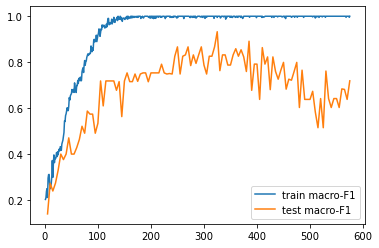

In [17]:
path = './log/final/needStance/origion/'

files = []
drop = [0.2]
weight = [1e-3,1e-4]
for d in drop:
    for w in weight:
        files.append('{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
            50, 64, 256, d, w
        ))

f12file = {}
for file in files:
    with open(path + file, 'r') as f:
        content = json.loads(f.read())
    trainRumorF1 = np.array(content['trainRumorF1'])
    start = 0
    for index in range(len(trainRumorF1) - 20):
        window = trainRumorF1[index:index + 20]
        if abs(window.max() - window.min()) <= 0.01:
            start = index
            break
    testRumorF1 = np.array(content['testRumorF1'])
    part = testRumorF1[start // 5:]
    end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
    avgF1 = testRumorF1[start // 5 : end // 5].mean()
    f12file[str(avgF1)] = (deepcopy(content), file, avgF1, start, end)
f1 = list(f12file.keys())
f1 = sorted(f1)
f1.reverse()
status, name, avgF1, start, end = f12file[f1[0]]
status.keys()
epoch = [i for i in range(1, len(status['trainRumorF1']) + 1)]
testX = [i * 5 for i in range(1, len(status['testRumorF1']) + 1)]
#plt.plot(epoch, status['trainLoss'], label='train loss')
plt.plot(epoch, status['trainRumorF1'], label='train macro-F1')

#plt.plot(testX, status['testLoss'], label='test loss')
plt.plot(testX, status['testRumorF1'], label='test macro-F1')
#plt.plot(testX, status['testRumorAcc'], label='test accuracy')
# plt.plot(testX, status['testRumorAcc'])
#plt.plot(testX, status['testStanceF1'])
plt.legend()
print(name)
print('max F1:',status['macroF1Rumor'], ',max Acc:', status['accRumor'], ',avgF1:', avgF1,\
      ',start:', start, ',end:', end, )

In [ ]:
path = './log/final/needNoStance/origion/'
w2v = [25,50,100,200]
s2v = [64,128,256]
hidden = [64,128,256]
drop = [0.2,0.5]
weight = [1e-3, 1e-4]
scoreF1Rumor = []
scoreAccRumor = []
scoreF1Stance = []
scoreAccStance = []
for w in w2v:
    for d in drop:
        for we in weight:
            file = '{:d}w2v-{:d}s2v-{:d}hidden-{:.1f}dropout-{:f}weight.json'.format(
                w, 64, 128, d, we
            )
            f12file = {}
            with open(path + file) as f:
                content = json.loads(f.read())
                trainRumorF1 = np.array(content['trainRumorF1'])
            start = 0
            for index in range(len(trainRumorF1) - 20):
                window = trainRumorF1[index:index + 20]
                if abs(window.max() - window.min()) <= 0.005:
                    start = index
                    break
            testRumorF1 = np.array(content['testRumorF1'])
            part = testRumorF1[start // 5:]
            end = (start // 5 + (np.where(part == np.max(part))[0].tolist()[0] + 10)) * 5
            avgF1 = testRumorF1[start // 5 : end // 5].mean()
            f12file[str(avgF1)] = (deepcopy(content), file, avgF1, start, end)
    f1 = list(f12file.keys())
    f1 = sorted(f1)
    f1.reverse()
    status, name, avgF1, start, end = f12file[f1[0]]
    scoreF1Rumor.append(avgF1)
    scoreAccRumor.append(status['testRumorAcc'][start // 5 : end // 5].mean())
    scoreF1Stance.append(status['testStanceAcc'][start // 5 : end // 5].mean())
    scoreAccStance.append(status['testRumorAcc'][start // 5 : end // 5].mean())
plt.subplot(1,3,1)

In [ ]:
path = './log/final/needNoStance/origion/'
file = '50w2v-64s2v-256hidden-0.2dropout-0.001000weight.json'

### 单任务谣言检测结果，SemEval-remake数据集

In [ ]:
path = './log/final/onlyRumor/semeval-remake/'
allFiles = os.listdir(path)
files = []
for i in range(len(allFiles)):
    if '.json' in allFiles[i]:
        files.append(allFiles[i])

f12file = {}
for file in files:
    with open(path + file, 'r') as f:
        content = json.loads(f.read())
    f12file[str(content['macroF1Rumor'])] = (deepcopy(content), file)
f1 = list(f12file.keys())
f1 = sorted(f1)
f1.reverse()
status = f12file[f1[0]][0]
status.keys()
epoch = [i for i in range(1, len(status['trainRumorF1']) + 1)]
testX = [i * 5 for i in range(1, len(status['testRumorF1']) + 1)]
plt.plot(epoch, status['trainLoss'], label='train loss')

#plt.plot(testX, status['testLoss'], label='test loss')
plt.plot(testX, status['testRumorF1'], label='test macro-F1')
plt.plot(testX, status['testRumorAcc'], label='test accuracy')
# plt.plot(testX, status['testRumorAcc'])
#plt.plot(testX, status['testStanceF1'])
plt.legend()
print(f12file[f1[0]][1])
print('max F1:',status['macroF1Rumor'], ',max Acc:', status['accRumor'])